- Raunak trying to learn stuff before incorporating Zach stuff into ngsim
- Purpose of this code is to find the types of things that Zach has used
- So that we can initialize the correct types when calling Zach code from env file
- Learning
    - Have to do `include_visualization()` to be able to use `visualize` function
    - Had to change `Multilane.jl/src/visualization.jl` to work 
    with `CarPhysicalState` instead of `CarState` 
    (see Zach's pull request in Multilane.jl for more details)
- Timeline
    - 17 Dec 2018: Added planner states visualization
    - Using Reel to make saveable video (instead of seeing here within notebook) was
    inspired by `crosswalk.ipynb` tutorial in `AutomotiveDrivingModels`

In [1]:
using POMDPToolbox
using POMDPs
using POMCPOW
using Multilane
using AutoViz
using Reel
using AutomotiveDrivingModels
using JLD

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5dc1e185f8b2175037a0bb4bac5baa1c8ca39ea5-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5dc1e185f8b2175037a0bb4bac5baa1c8ca39ea5-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

INFO: Loading HttpServer methods...


In [3]:
solver = SimpleSolver()
cor = 0.75
behaviors = standard_uniform(correlation=cor)
pp = PhysicalParam(5, w_lane = 3.0, lane_length=100.0)
dmodel = NoCrashIDMMOBILModel(10,pp,behaviors=behaviors,p_appear=1.0,
                            lane_terminate=true,max_dist=1000.0,
                            brake_terminate_thresh=4.0,
                            speed_terminate_thresh=15.0)
rmodel = SuccessReward(lambda=0)
pomdp = NoCrashPOMDP{typeof(rmodel), typeof(behaviors)}(dmodel, rmodel, 0.95, false)
mdp = NoCrashMDP{typeof(rmodel), typeof(behaviors)}(dmodel, rmodel, 0.95, false)
policy = solve(solver,mdp);

In [ ]:
AutomotiveDrivingModels.DEFAULT_LANE_WIDTH

In [ ]:
pp.w_lane

In [ ]:
seed = 12
srand(seed)
n = 5
xs = rand(5).*100.0
ys = rand(5).*4
vels = 1.0*randn(5).+30.0
x = 150.0
t = x/30.0
egostate = CarPhysicalState(50.0,0.0,30.0,0.0,1)
state = MLPhysicalState(x,t,[egostate],nothing)
for i in 1:n
    cs = CarPhysicalState(xs[i],ys[i],vels[i],0.0,i+1)
    push!(state.cars,cs)
end
a = action(policy,state)

# Visualization
- Load planner_state from jld file
- Use visualization function
- Save to disk option is also there if needed

In [ ]:
include_visualization()

In [34]:
h = load("zach_state_viz_2_heuristic.jld")

Dict{String,Any} with 1 entry:
  "states_over_time" => Multilane.MLPhysicalState[Multilane.MLPhysicalState(155…

In [35]:
viz_states = (h["states_over_time"])
length(viz_states)

100

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_32", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-415fdbd3-7329-4b95-b2a4-e954105b6ee5", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["step"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 100),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_31", 50, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/raunak/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/raunak/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/raunak/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/raunak/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/raunak/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":50}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {return this
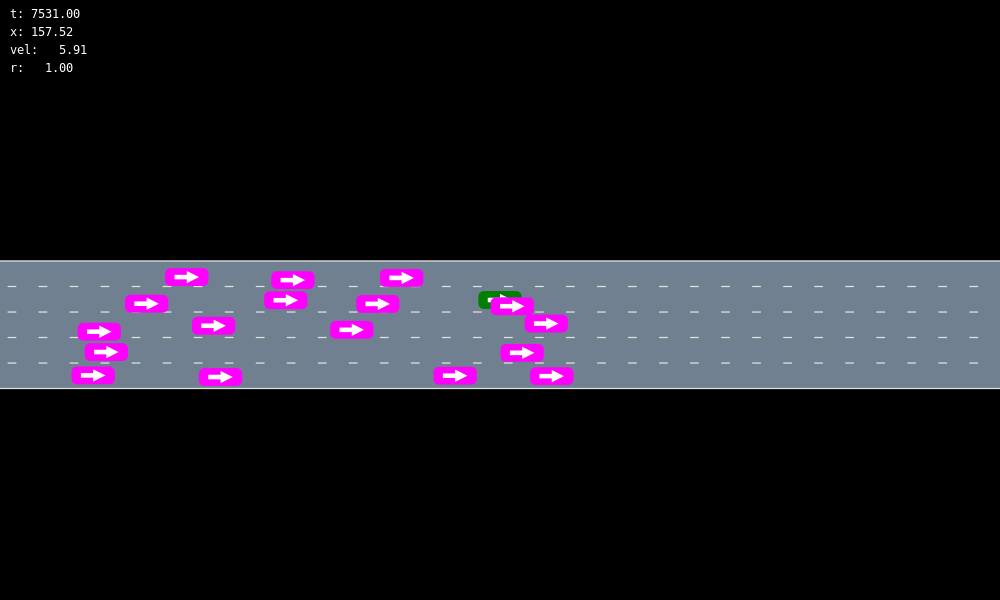
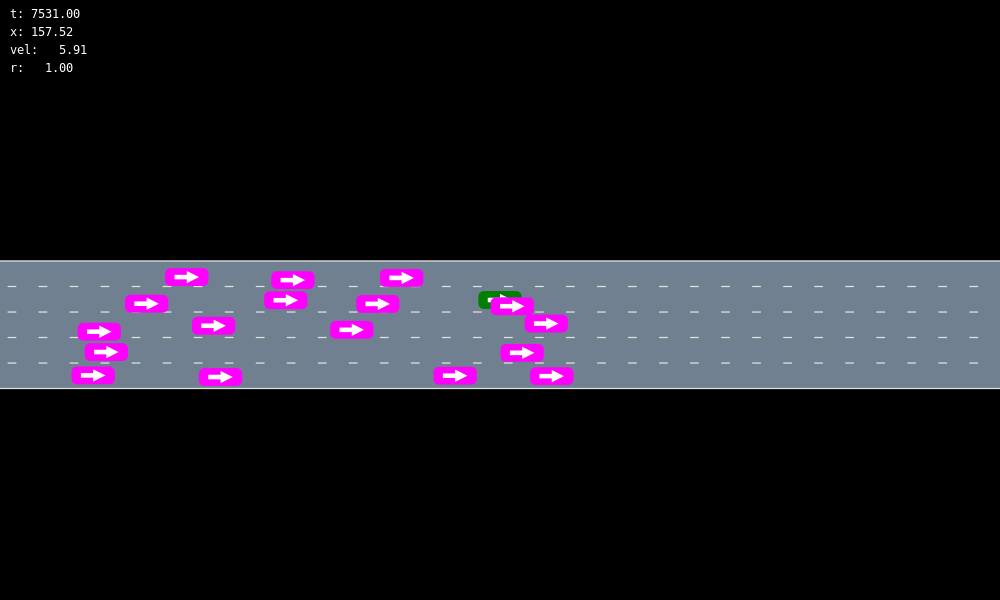

In [36]:
using Interact
@manipulate for step in 1 : length(viz_states)
    visualize(pomdp,viz_states[step],1)
end

## If saving the gif/mp4 is required

In [7]:
function visual_planner(t,dt)
    framenum = Int(floor(t/dt))+1
    visualize(pomdp,viz_states[framenum],1)
end

visual_planner (generic function with 1 method)

In [32]:
film = roll(visual_planner,fps=10,duration=10.0);

In [37]:
write("planner_state_seed_2_heuristic.gif",film)

"planner_state_seed_2_heuristic.gif"

# Types of things

In [ ]:
typeof(policy)

In [ ]:
typeof(mdp)

In [ ]:
typeof(pomdp)

In [ ]:
typeof(rmodel)

In [ ]:
typeof(dmodel)

In [ ]:
typeof(pp)

In [ ]:
typeof(behaviors)

In [ ]:
typeof(cor)

In [ ]:
typeof(solver)

In [ ]:
@fields(solver)

In [ ]:
fields(solver)

In [ ]:
fieldnames(solver)

In [ ]:
@show action